<a href="https://colab.research.google.com/github/arjunsumina/analytics_code/blob/main/MS7165D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CODE CREATED BY ARJUN ANIL KUMAR
11 OCTOBER 2023 TIME -9.19 AM

code 1 : principal component analysis <br>
         1. It is a mathematical operation done on strucutured data to convert a set of correlated columns into a set of columns with no correlation.<br>
         2. It is also seen as a dimensionality reduction technique where a n*k structured data A can be converted to a n*m structured data B where m is less than k. <br>
         3. The new k columns of B are not directly picked from n columns of A. In fact, each of the k columns can be represented as a linear combination of the some of the columns of A. <br>

Goal : A wine data set is given to you and is loaded in my google drive. I have shared this file with you and you can use it.   

The data set has around 13 features of wines that possibly determinermines its customer segment. The number of customer segments is 3. We need to develop a logistic regresion model using the information available in the features of the dataset.

This example illustrates the power of the PCA to reduce the dimensions and create latent dimensions that can help int the predictions.
*italicized text*


In [6]:
# importing required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [33]:
dataset = pd.read_csv('/content/drive/MyDrive/Nit_teaching/BIG_DATA/LAB_EXERCISES/data/wine_pca.csv')
print(dataset)
print('The number of elements in each column of dataset is')
print(dataset.count())
print('The total elements of the dataset or the size is')
print(dataset.size)
print('The dimension of the dataset is')
print(dataset.ndim)
print('The shape of the dataset is')
print(dataset.shape)

     Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0      14.23        1.71  2.43          15.6        127           2.80   
1      13.20        1.78  2.14          11.2        100           2.65   
2      13.16        2.36  2.67          18.6        101           2.80   
3      14.37        1.95  2.50          16.8        113           3.85   
4      13.24        2.59  2.87          21.0        118           2.80   
..       ...         ...   ...           ...        ...            ...   
173    13.71        5.65  2.45          20.5         95           1.68   
174    13.40        3.91  2.48          23.0        102           1.80   
175    13.27        4.28  2.26          20.0        120           1.59   
176    13.17        2.59  2.37          20.0        120           1.65   
177    14.13        4.10  2.74          24.5         96           2.05   

     Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0          3.06               

In [10]:
dataset.columns


Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline',
       'Customer_Segment'],
      dtype='object')

In [11]:
# create the dependent and independent variables
independent_X = dataset.iloc[:, 0:13].values
dependent_Y = dataset.iloc[:, 13].values

In [12]:
print(dependent_Y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]


In [70]:
#Training and Testing
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(independent_X, dependent_Y, test_size = 0.2, random_state = 0)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)
print(X_train)

(142, 13)
(36, 13)
(142,)
(36,)
[[1.369e+01 3.260e+00 2.540e+00 ... 9.600e-01 1.820e+00 6.800e+02]
 [1.269e+01 1.530e+00 2.260e+00 ... 9.600e-01 2.060e+00 4.950e+02]
 [1.162e+01 1.990e+00 2.280e+00 ... 1.160e+00 2.960e+00 3.450e+02]
 ...
 [1.242e+01 1.610e+00 2.190e+00 ... 1.060e+00 2.960e+00 3.450e+02]
 [1.390e+01 1.680e+00 2.120e+00 ... 9.100e-01 3.330e+00 9.850e+02]
 [1.416e+01 2.510e+00 2.480e+00 ... 6.200e-01 1.710e+00 6.600e+02]]


In [41]:
# performing preprocessing part
from sklearn.preprocessing import StandardScaler
scaler  = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)
print('The mean of training data before scaling ')
print(X_train.mean(axis = 0))
print('The mean of training data after scaling ')
print(X_train_scaled.mean(axis=0))


print('The variance of training data before scaling ')
print(X_train.var(axis = 0))
print('The variance of training data after scaling ')
print(X_train_scaled.var(axis=0))



The mean of training data before scaling 
[1.29848592e+01 2.37260563e+00 2.36690141e+00 1.95549296e+01
 1.00063380e+02 2.25866197e+00 1.94915493e+00 3.63521127e-01
 1.60605634e+00 5.04521126e+00 9.53352113e-01 2.58626761e+00
 7.42330986e+02]
The mean of training data after scaling 
[ 7.03662480e-16 -1.28799553e-15  3.00932987e-15  2.66707626e-15
 -1.79043009e-16  6.91934772e-16  6.17659288e-16 -6.86461842e-16
  8.63941156e-16 -2.17353522e-16 -3.59649712e-17  1.60591415e-15
 -9.46035113e-17]
The variance of training data before scaling 
[6.46943290e-01 1.23526715e+00 7.22171593e-02 1.17676870e+01
 2.01608659e+02 3.71531308e-01 9.45714779e-01 1.61946439e-02
 3.47080222e-01 5.62646010e+00 5.24897211e-02 5.18534661e-01
 9.16353904e+04]
The variance of training data after scaling 
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [100]:
# Applying PCA function on training and testing set of X component
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)
print('The shape of the training data before pca transformation is')
print(X_train_scaled.shape)
print('The shape of the training data after pca transformation is')
print(X_train_pca.shape)
print('The shape of the testing data before pca transformation is')
print(X_test_scaled.shape)
print('The shape of the testing data after pca transformation is')
print(X_test_pca.shape)


explained_variance = pca.explained_variance_ratio_
print(explained_variance)
print('the total percentage of variance of the data explained by the principal component is')
print(100*explained_variance.sum())

The shape of the training data before pca transformation is
(142, 13)
The shape of the training data after pca transformation is
(142, 2)
The shape of the testing data before pca transformation is
(36, 13)
The shape of the testing data after pca transformation is
(36, 2)
[0.36884109 0.19318394]
the total percentage of variance of the data explained by the principal component is
56.20250359227309


In [102]:
#machine learning model considered is logistic regression
#training the machine learning model using pca components of normalised training data
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train_pca, Y_train)

LogisticRegression(random_state=0)

In [103]:
# Predicting the results for pca components of the test data using trained logistic regression
Y_predicted = classifier.predict(X_test_pca)
print('Predicted Results using Logistic Regression')
print(Y_predicted)
print(Y_predicted.shape)
print('Expected Results for Logistic Regression')
print(Y_test)

Predicted Results using Logistic Regression
[1 3 2 1 2 1 1 3 2 2 3 3 1 2 3 2 1 1 2 1 2 1 1 2 2 2 2 2 2 3 1 1 2 1 1 1]
(36,)
Expected Results for Logistic Regression
[1 3 2 1 2 2 1 3 2 2 3 3 1 2 3 2 1 1 2 1 2 1 1 2 2 2 2 2 2 3 1 1 2 1 1 1]


[[14  0  0]
 [ 1 15  0]
 [ 0  0  6]]


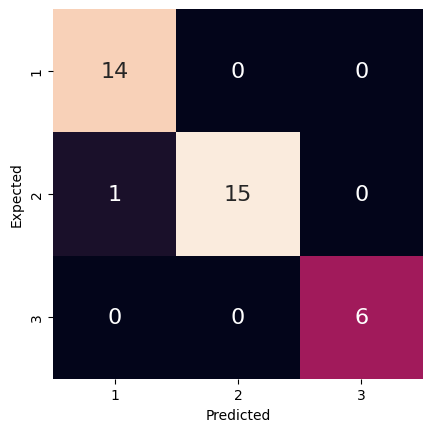

In [99]:
# Confusion matrix for measuring the performance of the classifier
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_predicted)
print(cm)
labels=['1','2','3']
df_cm = pd.DataFrame(cm, labels, labels)
# fancy visualization of confusion matrix
import seaborn as sn
ax = sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}, square=True, cbar=False, fmt='g')
ax.set_ylim(0, 3) #this manually corrects the cutoff issue in sns.heatmap found in matplotlib ver 3.1.1
plt.xlabel("Predicted")
plt.ylabel("Expected")
ax.invert_yaxis() #optional
plt.show()


[[-3.4304258 -3.4204258 -3.4104258 ...  3.1695742  3.1795742  3.1895742]
 [-3.4304258 -3.4204258 -3.4104258 ...  3.1695742  3.1795742  3.1895742]
 [-3.4304258 -3.4204258 -3.4104258 ...  3.1695742  3.1795742  3.1895742]
 ...
 [-3.4304258 -3.4204258 -3.4104258 ...  3.1695742  3.1795742  3.1895742]
 [-3.4304258 -3.4204258 -3.4104258 ...  3.1695742  3.1795742  3.1895742]
 [-3.4304258 -3.4204258 -3.4104258 ...  3.1695742  3.1795742  3.1895742]]


<ipython-input-135-a64f26c8d09c>:24: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


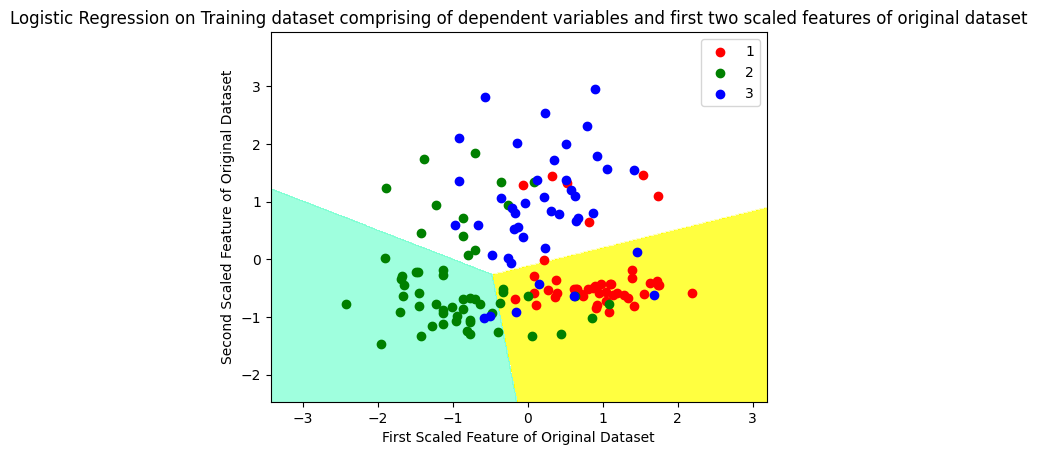

In [135]:
# Lets us visually see what has happened.
# There were 13 features in the original data set and the problem at hand was to predict the class based on
# the 13 features
# Lets us pick first two columns as features and check the target labels
#pick rows 1 and row 2 indexed by 0 and 1 respectively
X_trained_scaled_two_cols = X_train_scaled[:, [0,1]]
#print(X_trained_scaled_two_cols)
from matplotlib.colors import ListedColormap
#print(X_trained_scaled_two_cols)
X_set, y_set = X_trained_scaled_two_cols, Y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,
                     stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1,
                     stop = X_set[:, 1].max() + 1, step = 0.01))
#print(X1)
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(),
             X2.ravel()]).T).reshape(X1.shape), alpha = 0.75,
             cmap = ListedColormap(('yellow', 'white', 'aquamarine')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)

plt.title('Logistic Regression on Training dataset comprising of dependent variables and first two scaled features of original dataset')
plt.xlabel('First Scaled Feature of Original Dataset') # for Xlabel
plt.ylabel('Second Scaled Feature of Original Dataset') # for Ylabel
plt.legend() # to show legend
# show scatter plot
plt.show()

In [ ]:
# Lets us visually see what has happened.
# There were 13 features in the original data set and the problem at hand was to predict the class based on
# the 13 features
# Lets us pick first two principal components as features and check the target labels
from matplotlib.colors import ListedColormap
#print(X_trained_scaled_two_cols)
X_set, y_set = X_train_pca[:, [0,1]], Y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,
                     stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1,
                     stop = X_set[:, 1].max() + 1, step = 0.01))
#print(X1)
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(),
             X2.ravel()]).T).reshape(X1.shape), alpha = 0.75,
             cmap = ListedColormap(('yellow', 'white', 'aquamarine')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)

plt.title('Logistic Regression on Training dataset comprising of dependent variables and first two scaled features of original dataset')
plt.xlabel('First Scaled Feature of Original Dataset') # for Xlabel
plt.ylabel('Second Scaled Feature of Original Dataset') # for Ylabel
plt.legend() # to show legend
# show scatter plot
plt.show()

CODE CREATED BY ARJUN ANIL KUMAR
11 OCTOBER 2023 TIME -9.19 AM

code 2 : Singular Value Decomposition

Lets take a 3*2 matrix with 3 rows and 2 columns
the first row elements are 1,2
the second row elements are 3,4
the third row elements are 5,6

$A = U.D.V^T$

SVD means decomposing a rectangular matrix A ($m*n$) into three matrices U ($m*m$) , diagonal matrix or singular value matrix D ($m*n$) and $V^T$ ($n*n$)





In [150]:
from numpy import array
from scipy.linalg import svd
# define a matrix
A = array([[1, 2], [3, 4], [5, 6]])
print(A)
print('The dimension of dataset D is',A.shape)

# SVD
U, D, VT = svd(A)
print('The left singular matrix U is')
print(U)
print('The dimension of left singular matrix U is',U.shape)
print('The singular values are')
print(D)
print('The dimension of diagonal matrix D is',D.shape)
print('The right singular matrix V^T is')
print(VT)
print('The dimension of right singular matrix V^T  is',VT.shape)


[[1 2]
 [3 4]
 [5 6]]
The dimension of dataset D is (3, 2)
The left singular matrix U is
[[-0.2298477   0.88346102  0.40824829]
 [-0.52474482  0.24078249 -0.81649658]
 [-0.81964194 -0.40189603  0.40824829]]
The dimension of left singular matrix U is (3, 3)
The diagonal matrix is
[9.52551809 0.51430058]
The dimension of diagonal matrix D is (2,)
The right singular matrix V^T is
[[-0.61962948 -0.78489445]
 [-0.78489445  0.61962948]]
The dimension of right singular matrix V^T  is (2, 2)


In [156]:
# Reconstruct SVD
from numpy import zeros
from numpy import diag

# create m x n Sigma matrix

D_matrix = zeros((A.shape[0], A.shape[1]))
# populate Sigma with n x n diagonal matrix
D_matrix[:A.shape[1], :A.shape[1]] = diag(s)
print(D_matrix)
print('Shape of D_matrix is')
print(D_matrix.shape)
# reconstruct matrix
B = U.dot(D_matrix.dot(VT))
print(B)

[[9.52551809 0.        ]
 [0.         0.51430058]
 [0.         0.        ]]
Shape of D_matrix is
(3, 2)
[[1. 2.]
 [3. 4.]
 [5. 6.]]


In [176]:
# Dimensionality Reduction and SVD
from numpy import array
from numpy import diag
from numpy import zeros
from scipy.linalg import svd
# define a matrix
A = array([[1,2,3,4,5,6,7,8,9,10],
           [11,12,13,14,15,16,17,18,19,20],
           [21,22,23,24,25,26,27,28,29,30]])
print(A)
print('The shape of the matrix is',A.shape)
print('The number of rows of the matrix is',A.shape[0])
print('The number of columns of the matrix is',A.shape[1])

# Singular-value decomposition
U, D, VT = svd(A)
print('The shape of U matrix is', U.shape)
print('The shape of VT matrix is',VT.shape)
# create m x n Sigma matrix
D_matrix = zeros((A.shape[0], A.shape[1]))
# populate Sigma with n x n diagonal matrix
D_matrix[:A.shape[0], :A.shape[0]] = diag(D)

print('The D matrix is given as')
print(np.around(D_matrix))
print('The number of rows of D matrix is',D_matrix.shape[0])
print('The number of columns of D matrix is',D_matrix.shape[1])

# select only 2
n_elements = 2
D_matrix_selected = D_matrix[:, :n_elements]
print('The selected D matrix is')
print('The dimension of selected D matrix is',D_matrix_selected.shape)
print(np.around(D_matrix_selected))
print('The number of rows of selected D matrix is',D_matrix_selected.shape[0])
print('The number of columns of selected D matrix is',D_matrix_selected.shape[1])

VT_selected = VT[:n_elements, :]
print('The shape of VT is',VT.shape)
print('The shape of VT selected is',VT_selected.shape)

# reconstruction using 2 elements
A_reconstructed = U.dot(D_matrix_selected.dot(VT_selected))
print(A_reconstructed)




[[ 1  2  3  4  5  6  7  8  9 10]
 [11 12 13 14 15 16 17 18 19 20]
 [21 22 23 24 25 26 27 28 29 30]]
The shape of the matrix is (3, 10)
The number of rows of the matrix is 3
The number of columns of the matrix is 10
The shape of U matrix is (3, 3)
The shape of VT matrix is (10, 10)
The D matrix is given as
[[97.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  7.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]
The number of rows of D matrix is 3
The number of columns of D matrix is 10
The selected D matrix is
The dimension of selected D matrix is (3, 2)
[[97.  0.]
 [ 0.  7.]
 [ 0.  0.]]
The number of rows of selected D matrix is 3
The number of columns of selected D matrix is 2
The shape of VT is (10, 10)
The shape of VT selected is (2, 10)
[[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
 [11. 12. 13. 14. 15. 16. 17. 18. 19. 20.]
 [21. 22. 23. 24. 25. 26. 27. 28. 29. 30.]]
